In [592]:
import numpy as np
import pandas as pd

data = pd.read_csv("AG_NO3_fill_cells_remove_NAN.csv")
data = data.dropna()
data["updated_flag"] = 0
datanp = np.asarray(data)
datanp

# for x in datanp:
#     if(x[2] == 1):
#         print(x)

array([['8/2/2016 12:29', 0.071, 0.0, 0],
       ['8/2/2016 12:59', 0.03, 0.0, 0],
       ['8/2/2016 13:29', 0.03, 0.0, 0],
       ...,
       ['6/28/2017 23:59', 1.286, 0.0, 0],
       ['6/29/2017 0:29', 1.288, 0.0, 0],
       ['6/29/2017 0:59', 1.278, 0.0, 0]], dtype=object)

In [593]:
window_size = 6
window_step_size = 1
threshold_percentage = 97
initial_threshold_value = 1

total_rows = len(datanp)
total_rows

new_threshold_value = initial_threshold_value
running_threshold_arr = []
np_running_threshold_arr =  np.asarray(running_threshold_arr)

runningMean = initial_threshold_value
last_n_threshold_runningMean = 50

for window_batch_start_index in range(0, total_rows - window_size + 1, window_step_size):
    window_batch_data = datanp[window_batch_start_index:window_batch_start_index + window_size]
#     print(window_batch_data)
    window_batch_data_nitrate =  window_batch_data[:,1]
#     print(window_batch_data_nitrate)

    value_of_threshold_percentage =  np.percentile(window_batch_data_nitrate, threshold_percentage)
    #     print(value_of_threshold_percentage)     
    np_running_threshold_arr = np.append(np_running_threshold_arr,value_of_threshold_percentage)
    np_running_threshold_arr_len =  len(np_running_threshold_arr) 
#     print(np_running_threshold_arr)  
    
#     Moving avg of last n threshold values
    
    if(np_running_threshold_arr_len > last_n_threshold_runningMean):
        lastnarr = np_running_threshold_arr[np_running_threshold_arr_len - last_n_threshold_runningMean: np_running_threshold_arr_len]
        runningMean = np.average(lastnarr)
        runningMean = runningMean * 1.25
        
        if(last_n_threshold_runningMean < 150):
            last_n_threshold_runningMean = last_n_threshold_runningMean + 1
    else:
        runningMean = initial_threshold_value
    
#     print(runningMean)
    
    if(value_of_threshold_percentage > runningMean):
        new_threshold_value = value_of_threshold_percentage          
        for batch_index in range(0, window_size):            
            if(window_batch_data_nitrate[batch_index] > new_threshold_value):
                datanp[window_batch_start_index + batch_index,3] = 1


anomaly_events = datanp[datanp[:, 3] == 1, :]
print("anomaly_event_cnt")
print(len(anomaly_events))


anomaly_event_cnt
1314


In [594]:
old_anom_detected = (datanp[:, 2] == 1)
new_anom_detected = (datanp[:, 3] == 1)

# Calculate total anomaly cases
total_anomaly_cases = np.sum(old_anom_detected == 1)
# print("Total Anomaly Cases:" + str(total_anomaly_cases))

# Calculate total anomaly detection cases
calculated_anomaly_cases = np.sum(new_anom_detected == 1)
# print("Calcualted Anomaly Cases:" + str(calculated_anomaly_cases))

# Calculate correct anomaly detection cases
correct_calculated_anomaly_cases = np.sum((old_anom_detected == 1) & (new_anom_detected == 1))
# print("Correct Calcualted Anomaly Cases:" + str(correct_calculated_anomaly_cases))


# Calculate total normal cases
total_normal_cases = total_rows - total_anomaly_cases
# print("Total Normal Cases:" + str(total_normal_cases))

# Calculate correct normal detection cases
calculated_normal_cases = total_rows - calculated_anomaly_cases
# print("Calcualted Normal Cases:" + str(calculated_normal_cases))

# Calculate correct anomaly detection cases
correct_calculated_normal_cases = np.sum((old_anom_detected == 0) & (new_anom_detected == 0))
# print("Correct Calcualted Normal Cases:" + str(correct_calculated_normal_cases))


# Calculate accuracy rates
normal_event_detection_accuracy_rate = correct_calculated_normal_cases / total_normal_cases
anomaly_event_detection_accuracy_rate = correct_calculated_anomaly_cases / total_anomaly_cases


print("normal event detection accuracy rate is :" + str(normal_event_detection_accuracy_rate))
print("anomaly event detection accuracy rate :" + str(anomaly_event_detection_accuracy_rate))

normal event detection accuracy rate is :0.9204754942470281
anomaly event detection accuracy rate :0.8181818181818182


63


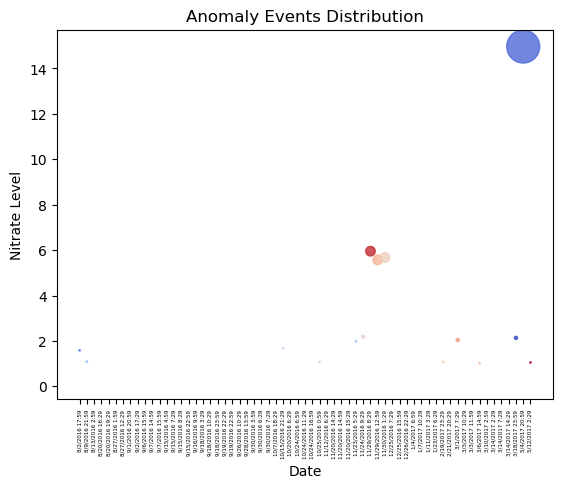

normal event detection accuracy rate is :0.9204754942470281
anomaly event detection accuracy rate :0.8181818181818182


In [611]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import math

datanp_updated = datanp[datanp[:, 2] == 1, :]
datanp_updated = datanp_updated[datanp_updated[:, 3] == 1, :]

N = len(datanp_updated)
print(N)
x = datanp_updated[:,0]
y = datanp_updated[:,1]
inty = y.astype(int)
colors = np.random.rand(N)
area = inty ** 2.4

xlabels = [dte for dte in x]
plt.xticks(ticks=range(len(inty)), labels=xlabels, rotation=90, fontsize=4)
plt.scatter(x, y, s=area, c=colors, alpha=0.8, cmap='coolwarm')


plt.title("Anomaly Events Distribution")
plt.xlabel("Date")
plt.ylabel("Nitrate Level")
plt.show()


print("normal event detection accuracy rate is :" + str(normal_event_detection_accuracy_rate))
print("anomaly event detection accuracy rate :" + str(anomaly_event_detection_accuracy_rate))

In [416]:
# import numpy as np

# def runningMean(x, n):
# #     y = np.zeros((len(x),))
# #     for ctr in range(len(x)):
# #          y[ctr] = np.sum(x[ctr:(ctr + n)])
# #     return y/n
#     return np.avg(x[ctr:(ctr + n)])

# def runningMeanFast(x, N):
#     return np.convolve(x, np.ones((N,))/N)[(N-1):]